# Downloading Libraries

In [2]:
!pip install sentencepiece

In [3]:
! pip install datasets transformers seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 649.1 kB/s eta 0:00:00 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=bb53f8908c426270d23b6bb72c8d4228fa4cd46158754f38fb8939abd128ba0d
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [4]:
!pip install accelerate

# Loading Model


In [5]:
!wget https://dl.fbaipublicfiles.com/biolm/RoBERTa-large-PM-M3-Voc-hf.tar.gz

--2024-05-21 09:44:30--  https://dl.fbaipublicfiles.com/biolm/RoBERTa-large-PM-M3-Voc-hf.tar.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.162.163.51, 3.162.163.34, 3.162.163.11, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.162.163.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 839592355 (801M) [application/gzip]
Saving to: 'RoBERTa-large-PM-M3-Voc-hf.tar.gz'

RoBERTa-large-PM-M3 100%[===================>] 800.70M   266MB/s    in 3.0s    

2024-05-21 09:44:33 (266 MB/s) - 'RoBERTa-large-PM-M3-Voc-hf.tar.gz' saved [839592355/839592355]



In [6]:
!tar -xf RoBERTa-large-PM-M3-Voc-hf.tar.gz

In [7]:
task = "ner"
model_checkpoint = "/kaggle/working//RoBERTa-large-PM-M3-Voc/RoBERTa-large-PM-M3-Voc-hf"
batch_size = 4

## Loading the dataset

In [8]:
from datasets import load_dataset, load_metric

In [9]:
datasets = load_dataset("ktgiahieu/maccrobat2018_2020")
datasets = datasets['train'].train_test_split(test_size=0.1)

Generating train split: 0 examples [00:00, ? examples/s]

The `datasets` object itself is [`DatasetDict`](https://huggingface.co/docs/datasets/package_reference/main_classes.html#datasetdict), which contains one key for the training, validation and test set.

In [10]:
datasets

DatasetDict({
    train: Dataset({
        features: ['tokens', 'tags'],
        num_rows: 360
    })
    test: Dataset({
        features: ['tokens', 'tags'],
        num_rows: 40
    })
})

In [11]:
from datasets import load_dataset,DatasetDict
import os
datasets = load_dataset("ktgiahieu/maccrobat2018_2020")
save_directory = "dataset"
datasets.save_to_disk(save_directory)

print(f"Dataset has been saved to {os.path.abspath(save_directory)}")
loaded_datasets = DatasetDict.load_from_disk(save_directory)
print(loaded_datasets)


Saving the dataset (0/1 shards):   0%|          | 0/400 [00:00<?, ? examples/s]

Dataset has been saved to /kaggle/working/dataset
DatasetDict({
    train: Dataset({
        features: ['tokens', 'tags'],
        num_rows: 400
    })
})


Convert To Dataframe

In [12]:
import pandas as pd
datasets = load_dataset("ktgiahieu/maccrobat2018_2020")
df = pd.DataFrame(datasets['train'])

In [13]:
print(df["tokens"][0])

['A', '68', '-', 'year', '-', 'old', 'female', 'nonsmoker', ',', 'nondrinker', 'with', 'a', 'medical', 'history', 'of', 'hypertension', 'presented', 'with', 'new', '-', 'onset', 'painless', 'jaundice', 'and', 'pruritus', ',', 'a', 'three', '-', 'month', 'history', 'of', '9.9', 'kg', 'weight', 'loss', 'and', 'chronic', 'diarrhea', 'with', 'four', 'to', 'five', 'loose', 'bowel', 'movements', 'per', 'day', '.', '\n', 'Medications', 'included', 'vitamin', 'D', ',', 'amlodipine', 'and', 'eprosartan', '.', '\n', 'Physical', 'examination', 'was', 'normal', 'except', 'for', 'jaundice', 'and', 'muscle', 'wasting', '.', '\n', 'Recent', 'colonoscopy', 'had', 'been', 'normal', '.', '\n', 'Total', 'and', 'direct', 'bilirubin', 'levels', 'were', '6.84', 'mg', '/', 'dL', '(', '116.96', 'μmol', '/', 'L', ')', 'and', '9.18', 'mg', '/', 'dL', '(', '156.98', 'μmol', '/', 'L', ')', ',', 'respectively', '.', '\n', 'Other', 'results', 'included', 'an', 'international', 'normalized', 'ratio', 'of', '1.0', ',

Remove Duplicates

In [14]:
sentsss=[]
tagsss=[]
count=0
for i in range(len(df["tokens"])):
    if df["tokens"][i] in sentsss:
        count+=1
    else:
        sentsss.append(df["tokens"][i])
        tagsss.append(df["tags"][i])


Created filtered tags based on previous results

In [15]:
df = pd.DataFrame({
    "tokens": sentsss,
    "tags": tagsss
})

filtered=["I-Sex","B-Sex","I-Age","B-Age","I-Clinical_event","B-Clinical_event", "I-Personal_background","B-Personal_background", "I-Sign_symptom", "B-Sign_symptom","I-Medication","B-Medication", "I-AGE", "B-AGE","I-Diagnostic_procedure","B-Diagnostic_procedure"]

Average: 540.995


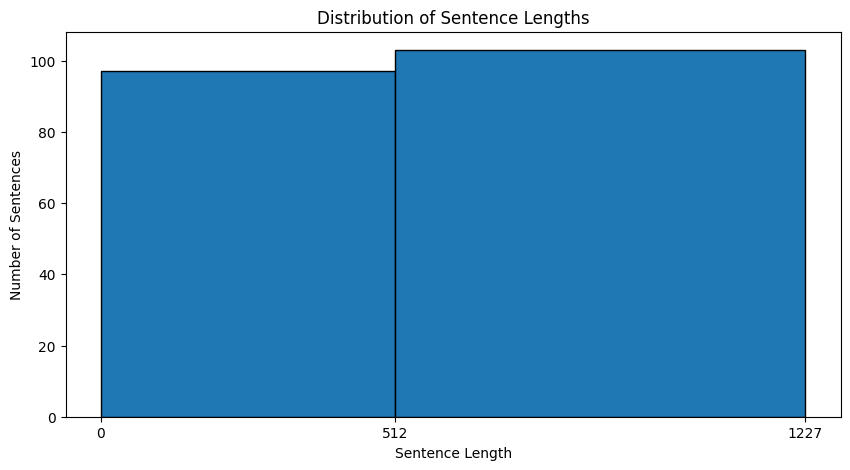

In [16]:
dict_length={}
count=0
sum=0
for i in sentsss:
    count+=1
    dict_length[count]=len(i)
    sum+=len(i)
print("Average:",sum/count)
dict_length
lengths = list(dict_length.values())
import matplotlib.pyplot as plt
# Define bins
bins = [0, 512, max(lengths)]

# Create histogram
plt.figure(figsize=(10, 5))
plt.hist(lengths, bins=bins, edgecolor='black')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')
plt.xticks([0, 512, max(lengths)])
plt.show()

Spliting Paragraphs into smaller chunks to reduce count to less than 512

In [17]:
sents=[]
sent=[]
tag=[]
tags=[]
i=0
a=0
stop=0
while i<len(df["tokens"]):
  sum=len(df["tokens"][i])
  half=sum//2
  a=0
  tag=[]
  sent=[]
  while a<half:
    if "." in df["tokens"][i][a] and len(df["tokens"][i][a])==1:
      stop=a
    a+=1

  for d in range(stop+1):
    sent.append(df["tokens"][i][d])
    if df["tags"][i][d] not in filtered:
        df["tags"][i][d]='O'
    tag.append(df["tags"][i][d])
  tags.append(tag)
  sents.append(sent)
  tag=[]
  sent=[]
  for d in range(stop+1,sum):
    sent.append(df["tokens"][i][d])
    if df["tags"][i][d] not in filtered:
        df["tags"][i][d]='O'
    tag.append(df["tags"][i][d])
  tags.append(tag)
  sents.append(sent)
  i+=1

Crosscheck split of data

In [18]:
a=0
for i in range(len(df["tokens"])):
  if len(df["tokens"][i])!=len(sents[a])+len(sents[a+1]) and len(sents[a])+len(sents[a+1])!=len(tags[a])+len(tags[a+1]):
    print(a,i)
    break
  a+=2



In [19]:
split_df = pd.DataFrame({"tokens": sents, "tags": tags})

# Write the DataFrame to a CSV file
split_df.to_csv("split_sentences_tags.csv", index=False)

Average: 270.4975


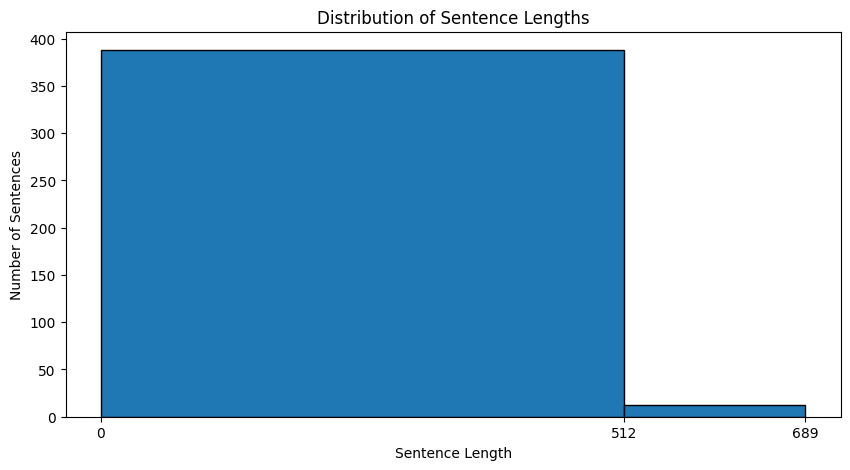

In [20]:
dict_length={}
count=0
sum=0
for i in sents:
    count+=1
    dict_length[count]=len(i)
    sum+=len(i)
print("Average:",sum/count)
dict_length
lengths = list(dict_length.values())
import matplotlib.pyplot as plt

bins = [0, 512, max(lengths)]


plt.figure(figsize=(10, 5))
plt.hist(lengths, bins=bins, edgecolor='black')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')
plt.xticks([0, 512, max(lengths)])
plt.show()

In [21]:
dict_tags={}
for labels in df["tags"]:
    for tag in labels:
        tag=tag.replace("B-","")
        tag=tag.replace("I-","")
        if 'O' in tag:
            continue
        if tag not in dict_tags:
            dict_tags[tag]=1
        else:
            dict_tags[tag]+=1

In [22]:
dict_tags

{'Age': 952,
 'Sex': 183,
 'Clinical_event': 545,
 'Sign_symptom': 3284,
 'Diagnostic_procedure': 5874,
 'Medication': 1035,
 'Personal_background': 65}

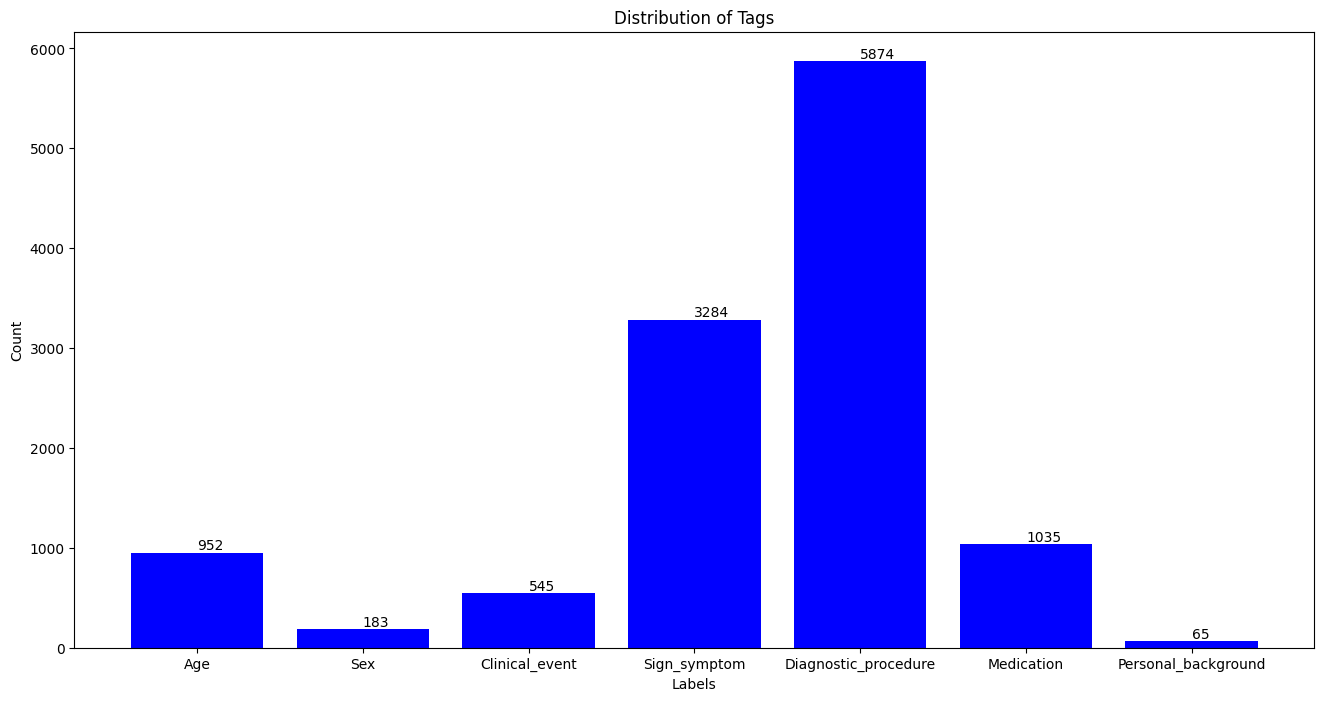

In [23]:
labels = list(dict_tags.keys())
counts = list(dict_tags.values())


plt.figure(figsize=(16, 8))
bars = plt.bar(labels, counts, color='blue')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # va: vertical alignment

plt.title('Distribution of Tags')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()
#sex, clinical_event, personal_background, sign_symtom, Medication, AGE, Diagnostic_procedure

In [24]:
from datasets import Dataset, DatasetDict
data_dict = {
    "tokens": sents,
    "tags": tags
}
split_dataset = Dataset.from_dict(data_dict)

# Create a DatasetDict with the new Dataset
split_dataset_dict = DatasetDict({
    "train": split_dataset
})

print(split_dataset_dict)

DatasetDict({
    train: Dataset({
        features: ['tokens', 'tags'],
        num_rows: 400
    })
})


In [25]:
datasets=split_dataset_dict

In [26]:
datasets = datasets['train'].train_test_split(test_size=0.1)


In [27]:
datasets

DatasetDict({
    train: Dataset({
        features: ['tokens', 'tags'],
        num_rows: 360
    })
    test: Dataset({
        features: ['tokens', 'tags'],
        num_rows: 40
    })
})

In [28]:
from datasets import Dataset, concatenate_datasets, Features, Sequence, Value
import pandas as pd

# Load synthetic data
synthetic_data = pd.read_csv("/kaggle/input/synthetic-dataset/synthetic_medical_ner_dataset.csv")

synthetic_data['tokens'] = synthetic_data['tokens'].apply(eval)
synthetic_data['tags'] = synthetic_data['tags'].apply(eval)

features = Features({
    'tokens': Sequence(feature=Value(dtype='string')),
    'tags': Sequence(feature=Value(dtype='string'))
})

synthetic_dataset = Dataset.from_pandas(synthetic_data, features=features)

updated_train_dataset = concatenate_datasets([datasets['train'], synthetic_dataset])

datasets['train'] = updated_train_dataset



In [29]:
datasets

DatasetDict({
    train: Dataset({
        features: ['tokens', 'tags'],
        num_rows: 520
    })
    test: Dataset({
        features: ['tokens', 'tags'],
        num_rows: 40
    })
})

In [30]:
from datasets import Dataset, ClassLabel, Value, DatasetDict

# Define the ClassLabel feature with the label names
label_list = filtered=["I-Sex","B-Sex","I-Age","B-Age","I-Clinical_event","B-Clinical_event", "I-Personal_background","B-Personal_background", "I-Sign_symptom", "B-Sign_symptom","I-Medication","B-Medication", "I-AGE", "B-AGE","I-Diagnostic_procedure","B-Diagnostic_procedure",'O']
# filtered_label_list = [
#     "B-Diagnostic_procedure", "I-Diagnostic_procedure", "B-Sign_symptom", "B-Lab_value", 
#     "B-Biological_structure", "B-Detailed_description", "B-Disease_disorder", "B-Medication", 
#     "B-Therapeutic_procedure", "I-Biological_structure", "I-Sign_symptom", "I-Date", 
#     "I-History", "I-Disease_disorder", "I-Dosage", "I-Detailed_description"
# ]

# Create ClassLabel with the filtered list
label = ClassLabel(names=label_list)

# Function to map examples to the new numeric labels
# def map_labels(example):
#     return {
#         "tokens": example['tokens'],
#         "tags": example["tags"],
#         "numeric_tags": [label.encode_example(x) if x in filtered_label_list else 0 for x in example["tags"]],
#     }

# # Assuming you have a dataset called `datasets`
datasets = datasets.map(lambda example: {"tokens": example['tokens'],
    "tags": example["tags"],
    "numeric_tags": [label.encode_example(x) for x in example["tags"]],
})
# datasets = datasets.map(map_labels)


Map:   0%|          | 0/520 [00:00<?, ? examples/s]

Map:   0%|          | 0/40 [00:00<?, ? examples/s]

In [31]:
# datasets = datasets.map(lambda example: {"tokens": example['tokens'],
#     "tags": example["tags"],
#     "numeric_tags": [label.encode_example(x) for x in example["tags"]],
# })

In [32]:
# label_list=filtered_label_list

In [33]:
datasets

DatasetDict({
    train: Dataset({
        features: ['tokens', 'tags', 'numeric_tags'],
        num_rows: 520
    })
    test: Dataset({
        features: ['tokens', 'tags', 'numeric_tags'],
        num_rows: 40
    })
})

## Preprocessing the data

In [36]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, add_prefix_space=True)

In [37]:
import transformers
assert isinstance(tokenizer, transformers.PreTrainedTokenizerFast)

In [38]:
label_all_tokens = True

In [39]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True, max_length=512)

    labels = []
    for i, label in enumerate(examples[f"numeric_tags"]):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            # Special tokens have a word id that is None. We set the label to -100 so they are automatically
            # ignored in the loss function.
            if word_idx is None:
                label_ids.append(-100)
            # We set the label for the first token of each word.
            elif word_idx != previous_word_idx:
                label_ids.append(label[word_idx])
            # For the other tokens in a word, we set the label to either the current label or -100, depending on
            # the label_all_tokens flag.
            else:
                label_ids.append(label[word_idx] if label_all_tokens else -100)
            previous_word_idx = word_idx

        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

In [40]:
tokenized_datasets = datasets.map(tokenize_and_align_labels, batched=True)

Map:   0%|          | 0/520 [00:00<?, ? examples/s]

Map:   0%|          | 0/40 [00:00<?, ? examples/s]

## Fine-tuning the model

In [41]:
from transformers import AutoModelForTokenClassification, TrainingArguments, Trainer

model = AutoModelForTokenClassification.from_pretrained(model_checkpoint, num_labels=len(label_list))

# old_model= AutoModelForTokenClassification.from_pretrained(model_checkpoint)
# model= AutoModelForTokenClassification.from_pretrained("bert-base-uncased", num_labels=len(label_list))
# model.bert=old_model.bert

2024-05-21 09:45:14.169388: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-21 09:45:14.169486: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-21 09:45:14.253010: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.

In [42]:
datasets['train'].shape

(520, 3)

In [43]:
model_name = model_checkpoint.split("/")[-1]
args = TrainingArguments(
    f"{model_name}-finetuned-{task}",
    evaluation_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=7,
    weight_decay=0.01,
    lr_scheduler_type='cosine',
    report_to="wandb",
    push_to_hub=False,
)

In [44]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer)

In [45]:
metric = load_metric("seqeval")

/tmp/ipykernel_34/152412463.py:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("seqeval")
/opt/conda/lib/python3.10/site-packages/datasets/load.py:756: FutureWarning: The repository for seqeval contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/seqeval/seqeval.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [62]:
import numpy as np

def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    # Remove ignored index (special tokens)
    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = metric.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"],
        "accuracy": results["overall_accuracy"],
    }

In [63]:
trainer = Trainer(
    model,
    args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

Training Model

In [ ]:
import wandb
wandb.init(
    name="test_1"
)

trainer.train()

Evaluating Model

In [ ]:
trainer.evaluate()

In [ ]:
predictions, labels, _ = trainer.predict(tokenized_datasets["test"])
predictions = np.argmax(predictions, axis=2)

# Remove ignored index (special tokens)
true_predictions = [
    [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]
true_labels = [
    [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]

results = metric.compute(predictions=true_predictions, references=true_labels)
results


#sex, clinical_event, personal_background, sign_symtom, Medication